In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

# Domain decomposition method (DDM)

### Step1. Setup BEM subdomains

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:4(Total) 4(Edge) 0(Trace)
[Mesh] Number of Nodes:12(Total) 12(Edge) 0(Trace) 0(Source)


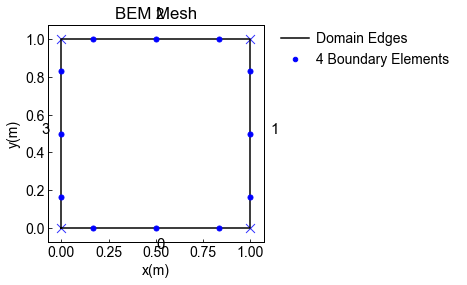

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 100)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:4(Total) 4(Edge) 0(Trace)
[Mesh] Number of Nodes:12(Total) 12(Edge) 0(Trace) 0(Source)


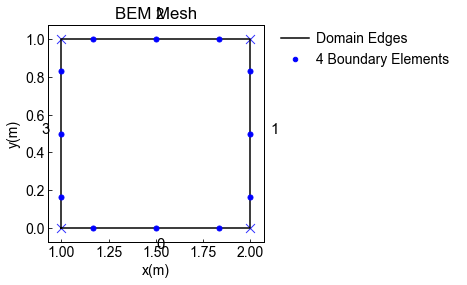

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(1, 10), (3, 0)]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:4(Total) 4(Edge) 0(Trace)
[Mesh] Number of Nodes:12(Total) 12(Edge) 0(Trace) 0(Source)


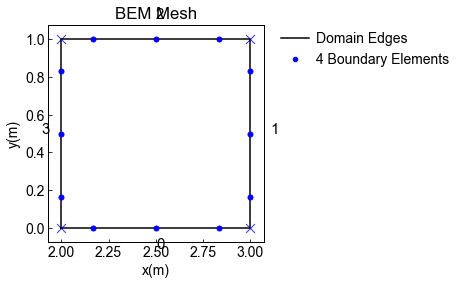

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(1, 0)]


In [2]:
#####Subdomain1########
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case1.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case1.plot_Mesh()
#2.Set Boundary condition
bc0=[(3,100)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

BEM_Case1.SetProps(k=2)

#####Subdomain2########
BEM_Case2=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(1.0, 0.0), (2.0, 0.0), (2.0, 1.0), (1.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case2.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case2.plot_Mesh()

#2.Set Boundary condition
bc0=[(1,10),(3,0)]
BEM_Case2.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

BEM_Case2.SetProps(k=4)

#####Subdomain3########
BEM_Case3=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(2.0, 0.0), (3.0, 0.0), (3.0, 1.0), (2.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case3.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")
BEM_Case3.plot_Mesh()

#2.Set Boundary condition
bc0=[(1,0)]
BEM_Case3.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

BEM_Case3.SetProps(k=1)

### Step2. Setup iterative coupling solver

-----Mesh Info-----
Total Number of Elements: 12
Total Number of Subdomains: 3


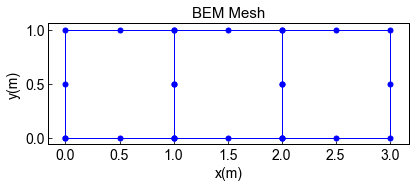

In [4]:
BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled
CommonEdges=[[(1.0, 0.0), (1.0, 1.0)],
             [(2.0, 0.0), (2.0, 1.0)]
            ]
Connects=[[(1,0)],  #BEM_case1 connect with BEM_case2(1) at its face 1 
          [(0,0),(2,1)],  #BEM_case2 coonect with BEM_case1(0) at its face 3
          [(1,1)]] 
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)

-----Mesh Info-----
Total Number of Elements: 12
Total Number of Subdomains: 3


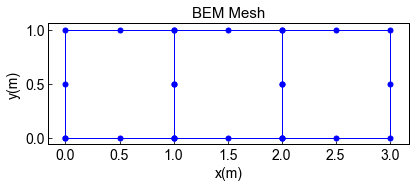

In [3]:
BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled

#Intersection 1
#Domain 0 <-> Domain 1
#BD 1 <-> BD 3
DomainID,BoundaryID=0,1
DomainID_connect,BoundaryID_connect=1,3
Intersect1=[DomainID,DomainID_connect,BoundaryID,BoundaryID_connect]

#Intersection 2
DomainID,BoundaryID=1,2
DomainID_connect,BoundaryID_connect=1,3
Intersect2=[DomainID,DomainID_connect,BoundaryID,BoundaryID_connect]

BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=[Intersect1,Intersect2])

### Step3. Parallel Robin-Robin Algorithm

-----Mesh Info-----
Total Number of Elements: 12
Total Number of Subdomains: 3


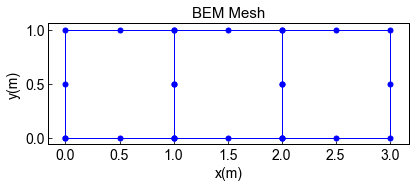

[Solution] #DOFs= 12
[Solution] #DOFs= 12
[Solution] #DOFs= 12
1	nan		alpha:	0.5
2	1.0		alpha:	0.5
3	1.0		alpha:	0.9642857142857139
4	0.733159268929504		alpha:	1.3737769080234838
5	0.8972809667673723		alpha:	0.9642857142857155
6	1.419858175394529		alpha:	1.0866654699196778
7	1.302068168860477		alpha:	0.8012727192987551
8	0.5100795810676542		alpha:	1.0411478300480719
9	0.37391042952545067		alpha:	0.9197781876587048
10	0.20260797403542738		alpha:	1.2704414355682876
11	0.5853915865406558		alpha:	0.9600266192447556
12	0.42566002954996035		alpha:	1.1116935563872288
13	0.6006276021204351		alpha:	0.8340595980638503
14	0.43994619170064664		alpha:	1.0473902928162735
15	0.3486371274128124		alpha:	0.9047874488563861
16	0.9665687345122602		alpha:	1.218394031726154
17	0.5964353680861834		alpha:	0.9542965889378934
18	0.4580994839231432		alpha:	1.1271428865199598
19	0.3984259694540999		alpha:	0.8547309149506838
20	0.372376523192506		alpha:	1.0549262017666345
21	0.6236956068019205		alpha:	0.8962823715

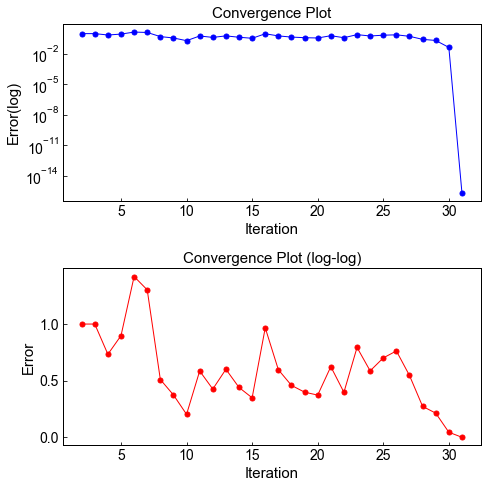

In [36]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-RR",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Neumann-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 12
Total Number of Subdomains: 3


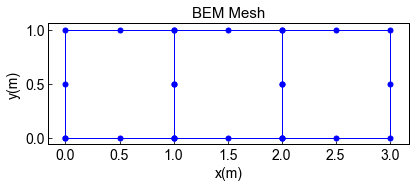

[Solution] #DOFs= 12
[Solution] #DOFs= 12
[Solution] #DOFs= 12
1	1.0		alpha:	0.5
2	1.0		alpha:	0.5
3	1779917087384849.2		alpha:	-2.1946246977938065e-16
4	0.16016246716384272		alpha:	-2.1946246977938057e-16
5	1.0304312666809803e-16		alpha:	-2.1946246977938062e-16
6	0.0		alpha:	-5.444771921533326e-17
Converged at 6 Steps! TOL= 1e-05
Dirichelt [32.56236045 31.99788656 29.94332289]
Neumann [34.47792971 34.47792971 26.47792971]


F:\1. PyBEM2D\Acclerated\PyBEM2D\Lib\Domain_Decomposition\Schemes\P_NN.py:120: RuntimeWarning: invalid value encountered in double_scalars
  error.append(max(abs(Q_new-Q_old))/max(abs(Q_new)))


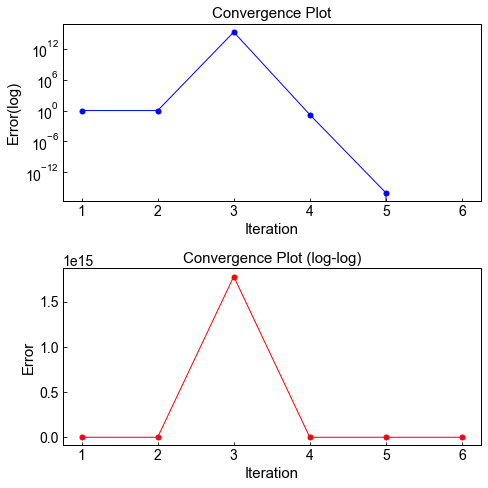

In [12]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-NN",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Dirichlet-Dirichlet Algorithm (winner)

-----Mesh Info-----
Total Number of Elements: 12
Total Number of Subdomains: 3


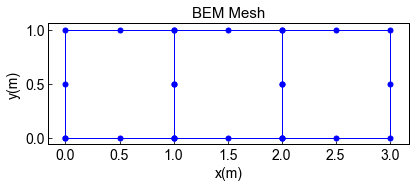

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(1, array([0., 0., 0.]))]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, array([0., 0., 0.]))]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(2, array([0., 0., 0.]))]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, array([0., 0., 0.]))]
[Solution] #DOFs= 12
[Solution] #DOFs= 12
[Solution] #DOFs= 12
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(1, array([103.81627182, 112.83235657, 116.47516379]))]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, array([103.81627182, 112.83235657, 116.47516379]))]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(2, array([91.41232556, 31.38968187, 21.2019097 ]))]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, array([91.41232556, 31.38968187, 21.2019097 ]))]
1	1.0		alpha:	0.5
[Boundary Condition] BCs set up
[Boundary Con

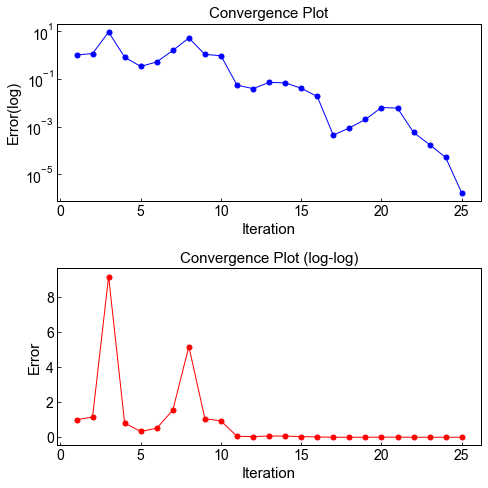

In [5]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=[Intersect1,Intersect2])
BEMSolver.Solve_Iter(Method="P-DD",TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Sequential Dirichlet-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 12
Total Number of Subdomains: 3


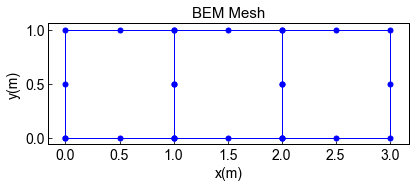

[Solution] #DOFs= 12
[Solution] #DOFs= 12
[Solution] #DOFs= 12
1	nan		alpha:	0.5
2	1.0		alpha:	0.5
3	0.696043165467626		alpha:	0.5088757396449706
4	0.2765259151296544		alpha:	0.3021332172398782
5	0.3368202177267302		alpha:	0.26275359464250525
6	0.9001202355976198		alpha:	0.4963784543442762
7	0.3054538050207236		alpha:	0.4938482817829843
8	0.2258641870108918		alpha:	0.27815721653812686
9	0.19100087586487685		alpha:	0.2954765520403903
10	0.1852870440107439		alpha:	0.5008790647291039
11	0.09395017877738845		alpha:	0.4775186712673933
12	0.053111396493951336		alpha:	0.25590162248758974
13	0.0687913267654385		alpha:	0.3295351906144965
14	0.07439255169450441		alpha:	0.504610493929811
15	0.03270483978572254		alpha:	0.4580759165340385
16	0.020053005618490112		alpha:	0.23508669635942508
17	0.027439301454605113		alpha:	0.36260032473725456
18	0.022960320352948833		alpha:	0.5076739261027825
19	0.010527190725339792		alpha:	0.43750494265625484
20	0.006465035896694275		alpha:	0.21786718976318933
21	0.

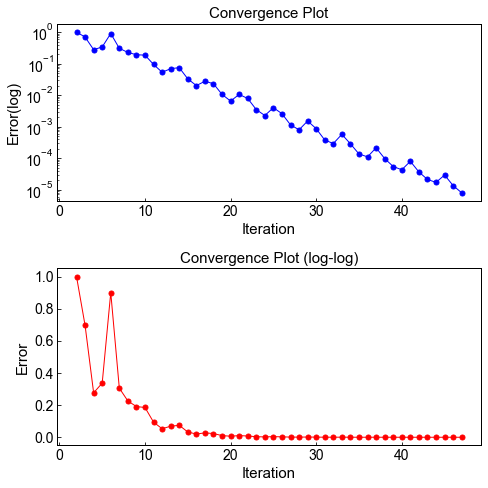

In [43]:
BEMSolver=BEMpy.DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="S-DN",TOL=1e-5,alpha=0.5,opt=1) #p-dn

### Step4. Solution Visulization & Verification

[Visulization] Plotting Solution


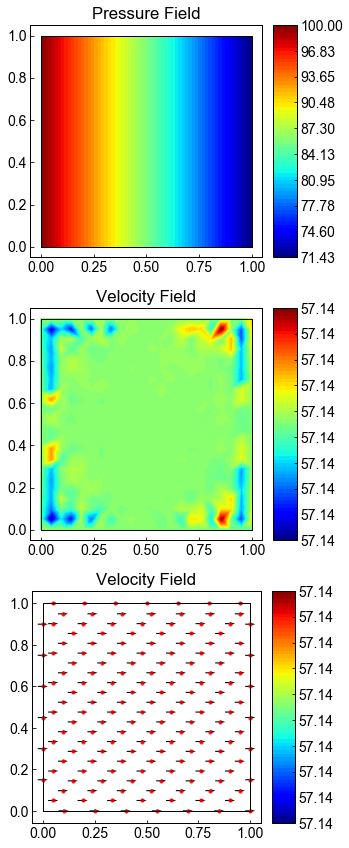

[Visulization] Plotting Solution


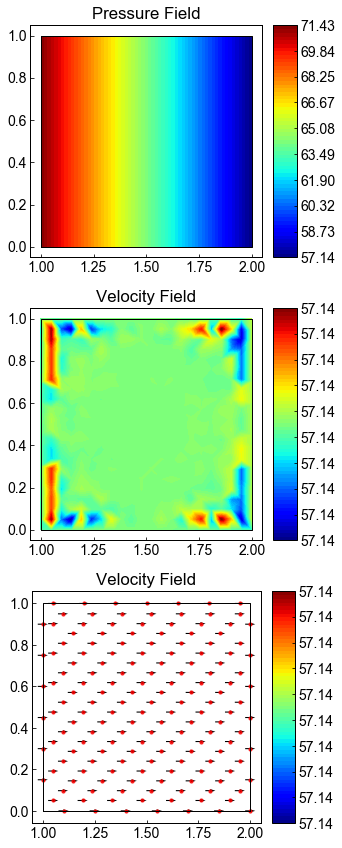

[Visulization] Plotting Solution


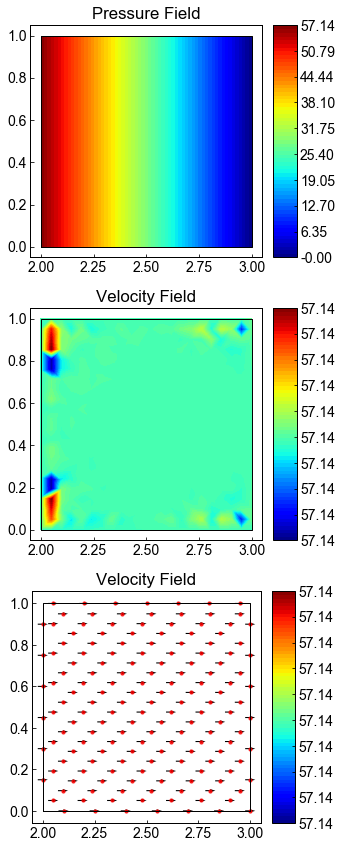

In [37]:
#Pressure and velocity contour results
PUV1=BEM_Case1.PostProcess.plot_Solution()
PUV2=BEM_Case2.PostProcess.plot_Solution()
PUV2=BEM_Case3.PostProcess.plot_Solution()

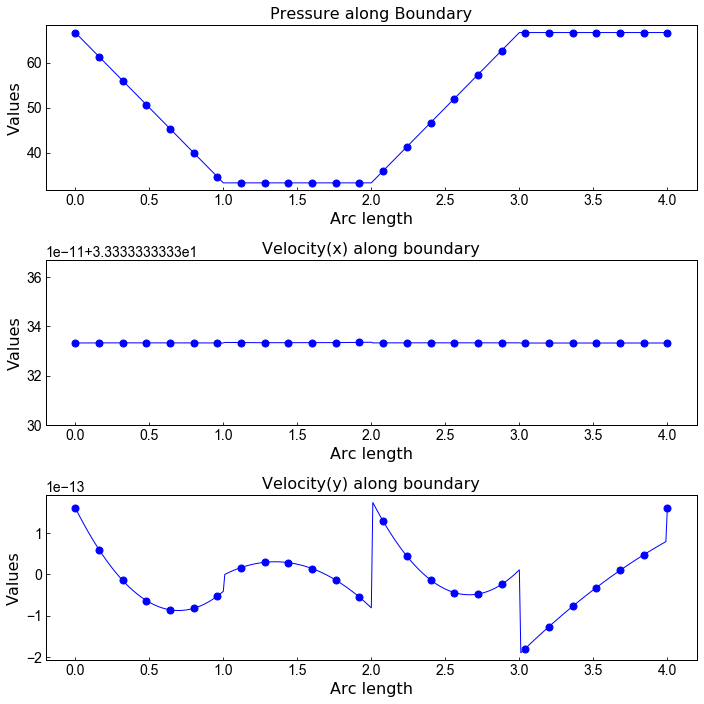

In [33]:
#Pressure and velocity along the boundary
P=BEM_Case2.PostProcess.plot_SolutionBD()